# Analisi parametri biomeccanici sprinter.
Per una migliore interpretazione dei parametri presenti nel file excel è importante sapere il significato di alcune delle variabili presenti:

- Vmax e Tau: Parametri del modello di prestazione.
- F0 (N/kg): Forza orizzontale espressa dall'atleta all'inizio, con valori che indicano il livello (principiante, medio, élite).
- Pmax (W/kg): Potenza massima espressa per kg di peso corporeo.
- FV slope: Rapporto tra F0 e V0, indica l'orientamento del modello verso forza o velocità.
- RF max: Proiezione della forza all'inizio dello sprint.
- Drf: Capacità di ritardare la Vmax, indicando l'efficacia della spinta in accelerazione.
- Vopt: Metà del V0, utile per determinare il punto in cui si raggiunge la Vmax e per programmare l'allenamento.

In [1]:
import pandas as pd

# Carico il foglio "From Split times" dal file Excel fornito
file_path = 'fvpsprint_splits-and-speed SIMONE 10-11-23.xlsx'
sheet_name = 'From Split times'

# Leggo i dati
df = pd.read_excel(file_path, sheet_name=sheet_name)
df.drop(columns='Unnamed: 0', inplace=True)

# Mostro le prime righe per avere un'idea dei dati
df.head()


,Distance (m),Time (s),Position model (s),Square Differences,Time (s).1,Position (t),Velocity (t),HZT acceleration (t),Air Friction (N),HZT Net Force (N),HZT Net Force (N/kg),HZT Power (W),HZT Power (W/kg),VTC Force (N),Ratio of Force (%)
0,5,1.364,4.963754,0.001314,0.01,0.000000,0.073025,7.274732,0.001615,472.859166,7.274756,34.530468,0.531238,NaN,NaN
1,10,2.079,9.969535,0.000928,0.02,0.001455,0.145496,7.219576,0.006411,469.278852,7.219675,68.278213,1.050434,NaN,NaN
2,15,2.702,14.988002,0.000144,0.03,0.003629,0.217418,7.164839,0.014316,465.728828,7.165059,101.257719,1.557811,NaN,NaN
3,20,3.29,20.067358,0.004537,0.04,0.006517,0.288794,7.110516,0.025258,462.208818,7.110905,133.483222,2.053588,NaN,NaN
4,25,3.843,25.038169,0.001457,0.05,0.010113,0.359629,7.056606,0.039169,458.718546,7.057208,164.968703,2.537980,NaN,NaN


Il foglio 'From Split times' del file Excel contiene diverse misurazioni e calcoli relativi alle prestazioni di un atleta sprinter durante un test di sprint. Ecco alcuni dei dati rilevanti presenti nel foglio:

- Distance (m): Distanza percorsa in metri.
- Time (s): Tempo impiegato per raggiungere la distanza specificata.
- Position model (s) e Square Differences: Valori relativi al modello di posizione e alle differenze quadrate per il calcolo degli errori.
- Time (s).1, Position (t), Velocity (t): Misurazioni temporali, di posizione e di velocità a intervalli regolari.
- HZT acceleration (t): Accelerazione orizzontale totale al tempo t.
- Air Friction (N), HZT Net Force (N), HZT Net Force (N/kg): Forza di attrito dell'aria e forza netta orizzontale totale, sia in Newton che normalizzata per il peso corporeo in kg.
- HZT Power (W), HZT Power (W/kg): Potenza orizzontale totale, sia in Watt che normalizzata per il peso corporeo in kg.
- VTC Force (N), Ratio of Force (%): Forza di trazione verticale e il rapporto percentuale di forza.

# Statistica descrittiva

In [2]:
# Rimozione delle colonne non necessarie e organizzazione dei dati

# Selezionare solo le colonne rilevanti per l'analisi
# Assumiamo che le colonne rilevanti siano quelle relative a distanza, tempo, velocità, forza, potenza e i parametri descritti nel file di testo

# Identificazione delle colonne rilevanti
colonne_rilevanti = [
    'Time (s).1', 
    'Velocity (t)', 
    'HZT acceleration (t)', 
    'Air Friction (N)', 
    'HZT Net Force (N/kg)', 
    'HZT Power (W/kg)'
]

# Filtraggio del dataset per mantenere solo le colonne rilevanti
sprinter_df = df[colonne_rilevanti]
# Visualizzazione delle prime righe per confermare la pulizia dei dati
sprinter_df.head()


,Time (s).1,Velocity (t),HZT acceleration (t),Air Friction (N),HZT Net Force (N/kg),HZT Power (W/kg)
0,0.01,0.073025,7.274732,0.001615,7.274756,0.531238
1,0.02,0.145496,7.219576,0.006411,7.219675,1.050434
2,0.03,0.217418,7.164839,0.014316,7.165059,1.557811
3,0.04,0.288794,7.110516,0.025258,7.110905,2.053588
4,0.05,0.359629,7.056606,0.039169,7.057208,2.537980


In [3]:
# Calcolo delle statistiche descrittive per i parametri rilevanti
statistiche_descrittive = sprinter_df.describe()
statistiche_descrittive


,Time (s).1,Velocity (t),HZT acceleration (t),Air Friction (N),HZT Net Force (N/kg),HZT Power (W/kg)
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,3.005000,7.552232,1.582542,19.016473,1.875104,10.094576
std,1.733494,2.401094,1.827397,8.687046,1.696703,4.665348
min,0.010000,0.073025,0.076200,0.001615,0.499486,0.531238
25%,1.507500,6.573653,0.238190,13.087035,0.642782,5.835312
50%,3.005000,8.653316,0.744542,22.677328,1.093424,8.787265
75%,4.502500,9.318634,2.327308,26.298512,2.528647,14.369710
max,6.000000,9.531479,7.274732,27.513589,7.274756,18.208842


# Data visualization
Iniziamo l'analisi dati andando a realizzare dei grafici che mostrano l'andamento delle variabili nel tempo.

Nota: questa tipologia di grafici è strattamente correlata al problema in oggetto.

Cominciamo con la visualizzazione dei grafici temporali, in particolare concentrandoci sulla velocità (Velocity (t)) e potenza (HZT Power (W/kg)) in funzione del tempo. Successivamente, analizzeremo distribuzioni bivariate e correlazioni.

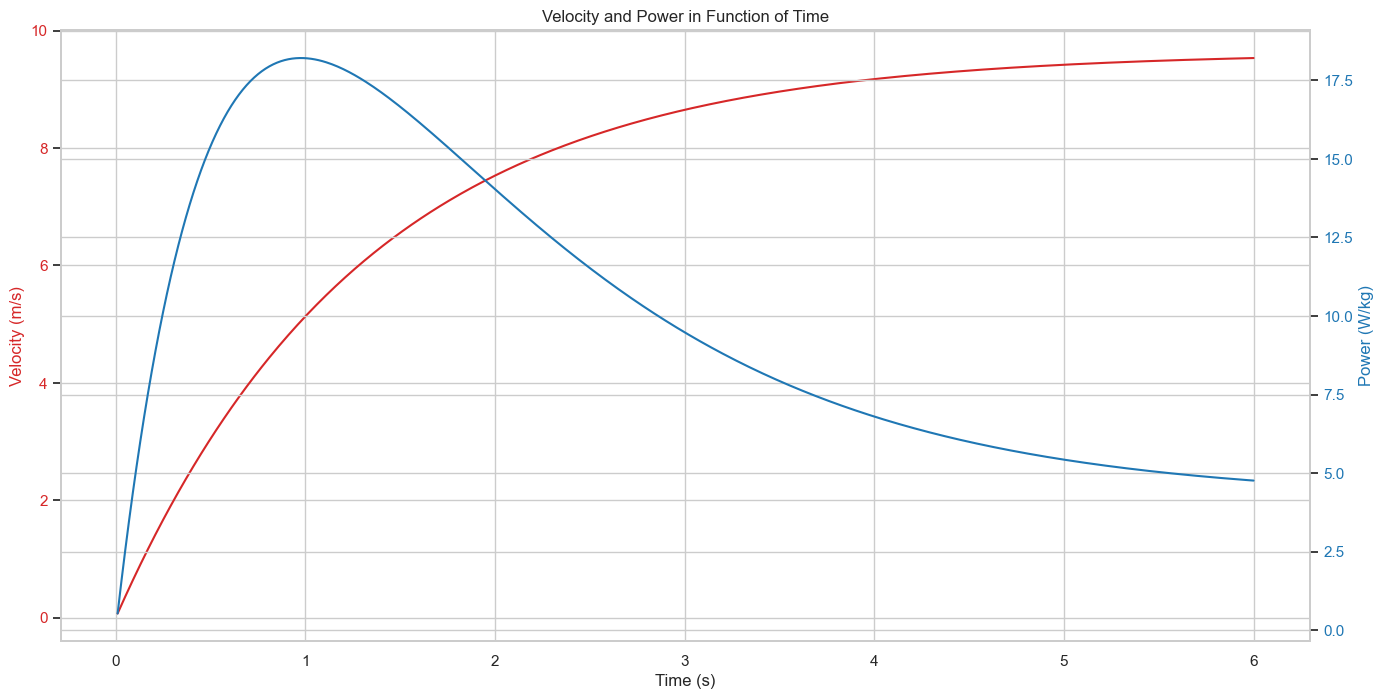

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Imposto lo stile dei grafici
sns.set(style="whitegrid")

# Preparazione dei dati per i grafici
time = sprinter_df['Time (s).1']  # Tempo in secondi
velocity = sprinter_df['Velocity (t)']  # Velocità
power = sprinter_df['HZT Power (W/kg)']  # Potenza per kg di peso corporeo

# Creazione dei grafici temporali per velocità e potenza
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Velocity (m/s)', color=color)
ax1.plot(time, velocity, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Istanzio un secondo asse y
color = 'tab:blue'
ax2.set_ylabel('Power (W/kg)', color=color)
ax2.plot(time, power, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # Per migliorare la disposizione
plt.title('Velocity and Power in Function of Time')
plt.show()


Il grafico mostra come la velocità (in rosso) e la potenza per kg di peso corporeo (in blu) variano in funzione del tempo. Si osserva che entrambe le misurazioni hanno una tendenza che può essere utile per analizzare le prestazioni dell'atleta nel corso del tempo, evidenziando momenti di picco e possibili aree per miglioramenti specifici. In particolare abbiamo:
- la velocità sembra raggiungere un plateaux dopo un certo numero di secondi, indice del fatto che l'atleta possa aver raggiunto la sua velocità 'limite'
- la potenza presenta un picco nei primi secondi della corsa ad indicare che l'atleta esprime maggiormente potenza nei primi "passi" in modo da poter raggiungere la sua velocità massima nel più breve tempo possibile.

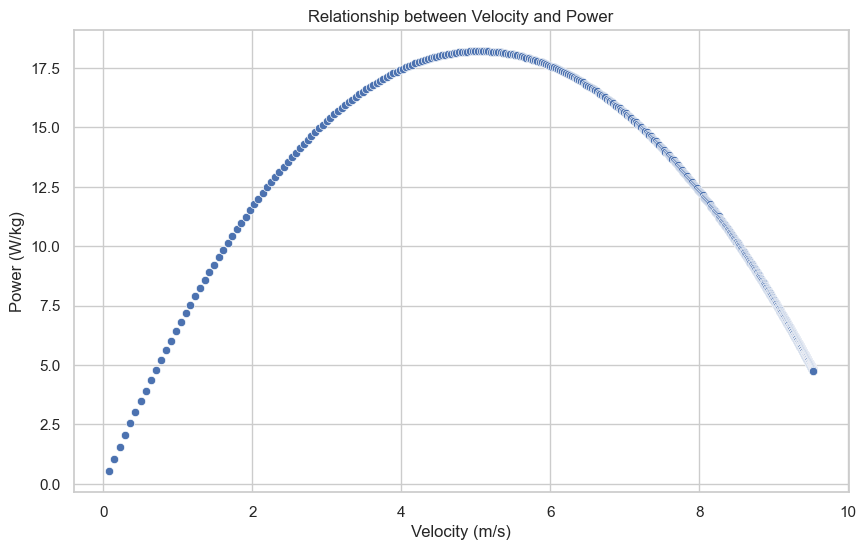

In [5]:
# Creazione del grafico scatter per esaminare la relazione tra velocità e potenza
plt.figure(figsize=(10, 6))
sns.scatterplot(x=velocity, y=power)
plt.title('Relationship between Velocity and Power')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Power (W/kg)')
plt.show()


Il grafico scatter mostra la relazione tra velocità e potenza per kg di peso corporeo. Si nota una correlazione negativa tra queste due variabili, come confermato dal coefficiente di correlazione di circa -0.53. Questo indica che, man mano che la velocità aumenta, la potenza per kg di peso corporeo tende a diminuire, il che può riflettere il passaggio da uno sforzo prevalentemente di forza a uno di mantenimento della velocità (come avevamo supposto in precedenza).

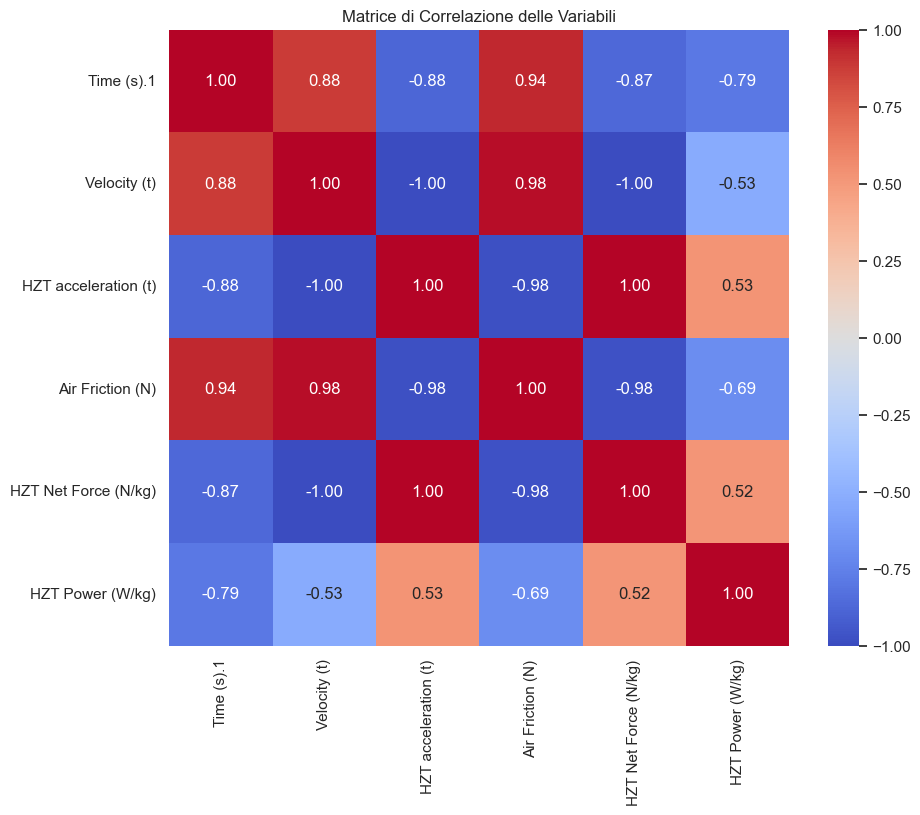

In [6]:
# Calcolo della matrice di correlazione
correlation_matrix = sprinter_df.corr()

# Visualizzazione della matrice di correlazione con heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice di Correlazione delle Variabili')
plt.show()


# Data cleaning and  preparation
Dopo aver effettuato una analisi visiva dei dati, possiamo procedere con la fase di pulizia e preparazione dei dati così da poterli poi usare per addestrare dei modelli di predizione.

In [7]:
# Filtraggio dei dati di prestazione per includere solo le distanze fino a 30 metri
train_df = sprinter_df[sprinter_df["Time (s).1"] <= 3.376].copy()
val_df = sprinter_df[(sprinter_df["Time (s).1"] > 3.376) & (sprinter_df["Time (s).1"] <= 4.376)].copy()
test_df = sprinter_df[sprinter_df["Time (s).1"] > 4.376].copy()

In [8]:
# Visualizzazione dei dati filtrati per conferma
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 337 entries, 0 to 336
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time (s).1            337 non-null    float64
 1   Velocity (t)          337 non-null    float64
 2   HZT acceleration (t)  337 non-null    float64
 3   Air Friction (N)      337 non-null    float64
 4   HZT Net Force (N/kg)  337 non-null    float64
 5   HZT Power (W/kg)      337 non-null    float64
dtypes: float64(6)
memory usage: 18.4 KB


In [9]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 337 to 436
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time (s).1            100 non-null    float64
 1   Velocity (t)          100 non-null    float64
 2   HZT acceleration (t)  100 non-null    float64
 3   Air Friction (N)      100 non-null    float64
 4   HZT Net Force (N/kg)  100 non-null    float64
 5   HZT Power (W/kg)      100 non-null    float64
dtypes: float64(6)
memory usage: 5.5 KB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163 entries, 437 to 599
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time (s).1            163 non-null    float64
 1   Velocity (t)          163 non-null    float64
 2   HZT acceleration (t)  163 non-null    float64
 3   Air Friction (N)      163 non-null    float64
 4   HZT Net Force (N/kg)  163 non-null    float64
 5   HZT Power (W/kg)      163 non-null    float64
dtypes: float64(6)
memory usage: 8.9 KB


La standardizzazione è un passaggio importante per le analisi dati.

Per la standardizzazione, utilizzeremo lo StandardScaler di scikit-learn, che sottrae la media e divide per la deviazione standard, portando ogni variabile a una media di zero e una deviazione standard di uno.

In [11]:
from sklearn.preprocessing import StandardScaler

# Standardizzazione dei dati nei set di training e validation, escludendo la prima colonna non necessaria
scaler = StandardScaler()

# Fit solo sui dati di training e trasformazione sia sui dati di training che di validation
X_train_velocity = scaler.fit_transform(train_df[["Velocity (t)"]])
y_train_velocity = train_df["Velocity (t)"].values  # Valori target di training

X_val_velocity = scaler.transform(val_df[["Velocity (t)"]])
y_val_velocity = val_df["Velocity (t)"].values  # Valori target di validation

X_test_velocity = scaler.transform(test_df[["Velocity (t)"]])
y_test_velocity = test_df["Velocity (t)"].values  # Valori target di test


# Analisi predittiva

In [12]:
from sklearn.linear_model import LinearRegression

# Creazione e addestramento del modello di regressione lineare sulla velocità
model = LinearRegression().fit(X_train_velocity, y_train_velocity)

# Predizione delle velocità sui dati di validation
velocity_predictions = model.predict(X_val_velocity)

# Calcolo del coefficiente R^2 per valutare le prestazioni del modello sul validation set
r_squared_velocity = model.score(X_val_velocity, y_val_velocity)
print('R^2 nel validation set:', r_squared_velocity)

R^2 nel validation set: 1.0


### Valutiamo le perfomance del modello 
Visualizziamo i valori predetti nel **validation set** e sovrapponendoli a quelli reali

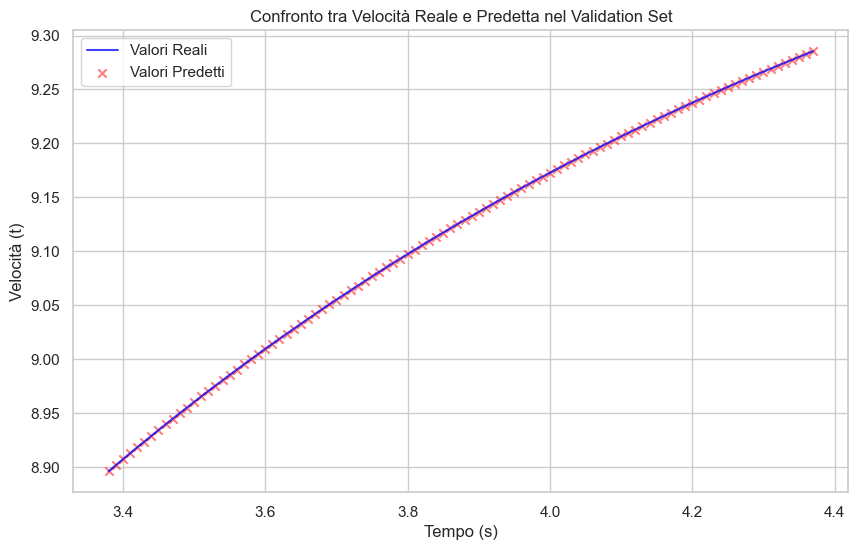

In [13]:
# Plot delle previsioni del modello contro i valori reali
plt.figure(figsize=(10, 6))

# Valori reali
plt.plot(val_df["Time (s).1"], y_val_velocity, color='blue', 
            label='Valori Reali', alpha=0.75)

# Valori predetti
plt.scatter(val_df["Time (s).1"], velocity_predictions, color='red', marker='x',
            label='Valori Predetti', alpha=0.5)

plt.title('Confronto tra Velocità Reale e Predetta nel Validation Set')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocità (t)')
plt.legend()
plt.show()


Nel grafico, abbiamo confrontato i valori reali della velocità (in blu) con quelli predetti dal modello di regressione lineare (in rosso) sul set di validation. Dato che il coefficiente R² è 1.0, i valori predetti si sovrappongono perfettamente ai valori reali, indicando una previsione precisa da parte del modello.

# Evaluation sul test set

R^2 nel test set: 1.0


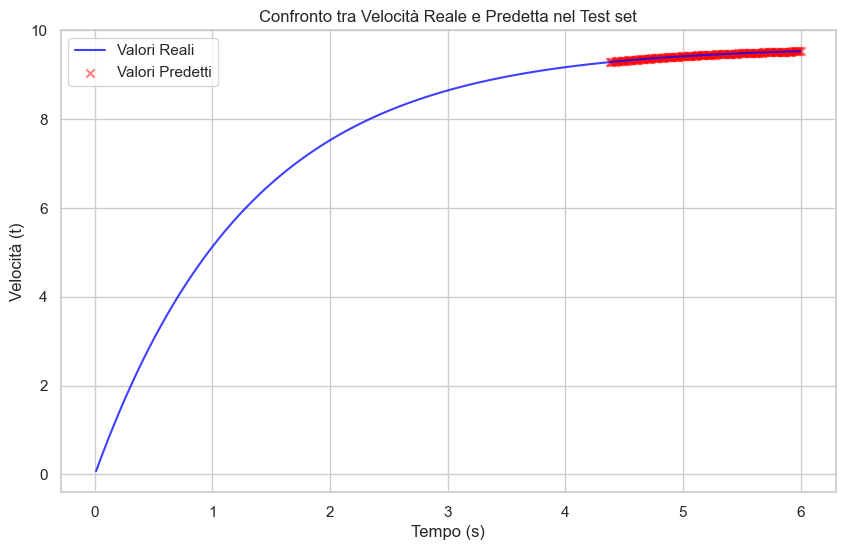

In [14]:
# Predizione delle velocità sui dati di validation
test_velocity_predictions = model.predict(X_test_velocity)

# Calcolo del coefficiente R^2 per valutare le prestazioni del modello sul test set
r_squared_velocity = model.score(X_test_velocity, y_test_velocity)
print('R^2 nel test set:', r_squared_velocity)

# Plot delle previsioni del modello contro i valori reali
plt.figure(figsize=(10, 6))

# Valori reali
plt.plot(sprinter_df["Time (s).1"], velocity, color='blue', label='Valori Reali', alpha=0.75)

# Valori predetti
plt.scatter(test_df["Time (s).1"], test_velocity_predictions,  color='red', marker='x',
            label='Valori Predetti', alpha=0.5)

plt.title('Confronto tra Velocità Reale e Predetta nel Test set')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocità (t)')
plt.legend()
plt.show()


### Q&A
- perchè il modello di regressione lineare 'funziona' molto bene in questo contesto?